In [1]:
from util import *

from src.dataset import load_mnist
from src.counterfactual import get_baseline_counterfactuals
import joblib

import warnings
warnings.filterwarnings('ignore')
                        
# Get a model
model = joblib.load('models/mnist.gz') # Model should have the BlackBox interface
model

MnistModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
)

In [2]:
loader = iter(load_mnist(100, train=False))
X_corpus, _ = next(loader)
X_test, _ = next(loader)

simplex = get_simplex(model, X_corpus, X_test, verbose = True)

Weight Fitting Epoch: 2000/10000 ; Error: 7.23e+03 ; Regulator: 57.2 ; Reg Factor: 1
Weight Fitting Epoch: 4000/10000 ; Error: 3.77e+03 ; Regulator: 22.6 ; Reg Factor: 1
Weight Fitting Epoch: 6000/10000 ; Error: 3.34e+03 ; Regulator: 11.9 ; Reg Factor: 1
Weight Fitting Epoch: 8000/10000 ; Error: 3.23e+03 ; Regulator: 7.97 ; Reg Factor: 1
Weight Fitting Epoch: 10000/10000 ; Error: 3.18e+03 ; Regulator: 6.11 ; Reg Factor: 1


In [3]:
i = 10

x = simplex.test_examples[i:i+1]
desired_class = model(x).topk(2).indices[0,1]

baseline_cfs = get_baseline_counterfactuals(model = model, target = desired_class, test = x, corpus = X_corpus)
cfs = simplex.get_counterfactuals(test_id = i, model = model, min_epochs = 50)

 50%|████████████████████▌                    | 50/100 [00:00<00:00, 278.94it/s]


Original || Counterfactual || Diff 


<Figure size 200x600 with 0 Axes>

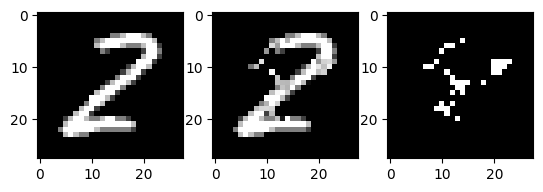

Predicted:  tensor(8)  ||  Desired:  tensor(8)  ||  Orginal:  tensor(2)
Sparsity =  tensor(0.0434)



In [4]:
display_image_cfs(cfs, model, x, desired_class)

Original || Counterfactual || Diff 


<Figure size 200x600 with 0 Axes>

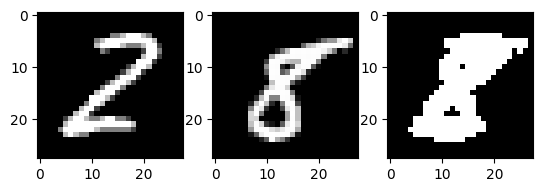

Predicted:  tensor(8)  ||  Desired:  tensor(8)  ||  Orginal:  tensor(2)
Sparsity =  tensor(0.2908)



In [5]:
display_image_cfs(baseline_cfs, model, x, desired_class)